<h1>Лабораторная работа №1.<span class="tocSkip"></span></h1>
<h2>Часть 1</h2>
<div class="toc"><ul class="toc-item"></ul></div>

In [3]:
import pandas as pd
from tabulate import tabulate
data = {
    "Вариант": [24],
    "Параметры (a; σ²)": ["(0;16)"],
    "n": [120],
    "q": [2.3],
    "k": [5],
    "Правило для расчета числа интервалов группировки": ["Фридмана Диакониса"],
    "Закон распределения случайной величины Y": ["F-распределение с числом степеней свободы k1=6 и k2=5"]
}

df = pd.DataFrame(data)
print(tabulate(df, headers='keys', tablefmt='psql', showindex=False))

+-----------+---------------------+-----+-----+-----+----------------------------------------------------+-------------------------------------------------------+
|   Вариант | Параметры (a; σ²)   |   n |   q |   k | Правило для расчета числа интервалов группировки   | Закон распределения случайной величины Y              |
|-----------+---------------------+-----+-----+-----+----------------------------------------------------+-------------------------------------------------------|
|        24 | (0;16)              | 120 | 2.3 |   5 | Фридмана Диакониса                                 | F-распределение с числом степеней свободы k1=6 и k2=5 |
+-----------+---------------------+-----+-----+-----+----------------------------------------------------+-------------------------------------------------------+


In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci

## 1. Смоделировать выборку из n независимых наблюдений над случайной величиной X, имеющей нормальный закон распределения с параметрами (a; σ²)

In [5]:
#исходные данные задачи 
n=120
mu, sigma = 0,16 

In [19]:
# Генерация выборки
s = np.random.normal(mu, sigma, n)
print(s)

# Оценка среднего и стандартного отклонения
a_estimate = np.mean(s)  # Среднее
sigma_estimate = np.std(s, ddof=1)  # Стандартное отклонение с поправкой на степень свободы

# Печать оценок
print(f"Оценка среднего (a): {a_estimate}")
print(f"Оценка стандартного отклонения (σ): {sigma_estimate}")

# Дополнительный расчет стандартного отклонения вручную
sum_squared_diff = 0
for i in s:
    sum_squared_diff += (i - a_estimate) ** 2

# Вычисление стандартного отклонения вручную
manual_sigma = math.sqrt(sum_squared_diff / (n - 1))
print(f"Стандартное отклонение (вручную): {manual_sigma}")

[ -1.55150901 -19.52582924  10.82297793  13.45975237   3.88022345
  -9.15155472  -0.20669568   8.02486153  13.0801468   -2.06635716
 -23.82037666  23.14750966 -41.43241083  12.1180817  -42.36534213
   0.49852679   8.73796821  -7.20518015 -16.43067652  23.99668334
   5.10481155  -0.6341075    4.20182273   4.25784756  20.207117
  -2.14510244 -12.26578532  -8.94266081 -16.11260811   5.71913199
  23.43626818 -29.33271183  34.41534245 -22.11014871  26.97417776
  -8.37538602  -7.57454641   0.57438429  24.59336999  15.17510934
  -9.46105568  34.80076463  -2.33333629  20.01904558  -1.22524201
  15.95300122 -12.04838059  -0.74594918  34.2327112   17.15436659
 -36.34764738 -26.59454555 -12.33797501 -10.82178385  17.93235844
 -10.48804826   2.65070796   2.58077326  -2.04802512  15.5182623
  29.76613603  23.49746111 -20.92393388  11.27480026   3.88792735
  -3.60951165   5.987581    -6.72602851  -0.92122144  29.39628733
 -11.42434021   0.37131017  19.13403712 -36.18347247 -20.66467147
  -9.32096922

## 1.1. Сгруппировать данные в интервалы и найти интервальный ряд абсолютных частот. Число интервалов группировки выбрать в соответствии с правилом, Фридмана Диакониса. Вычислить средствами Python сумму абсолютных частот. Построить гистограмму абсолютных частот.

In [20]:
# Используем правило Фридмана-Диакониса для определения количества интервалов
k_bins = np.histogram_bin_edges(s, bins="fd")
print(f"Количество интервалов: {len(k_bins) - 1}")

# Находим абсолютные частоты для каждого интервала
count, bin_edges = np.histogram(s, bins=k_bins)
print("Абсолютные частоты по интервалам:", count)
print("Границы интервалов:", bin_edges)

# Сумма абсолютных частот
total_count = np.sum(count)
print(f"Сумма абсолютных частот: {total_count}")

Количество интервалов: 9
Абсолютные частоты по интервалам: [ 4  5 12 20 23 23 16 10  7]
Границы интервалов: [-42.36534213 -33.79133027 -25.21731841 -16.64330655  -8.06929468
   0.50471718   9.07872904  17.6527409   26.22675277  34.80076463]
Сумма абсолютных частот: 120


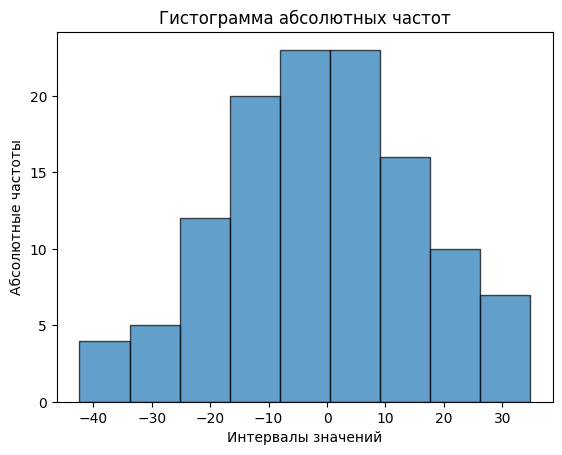

In [25]:
#Построить гистограмму абсолютных частот.
from scipy.stats import norm
# Построение гистограммы
count, bins, ignored = plt.hist(s, bins=k_bins, edgecolor='black', alpha=0.7)

# Добавление заголовков и подписей осей
plt.title("Гистограмма абсолютных частот")
plt.xlabel("Интервалы значений")
plt.ylabel("Абсолютные частоты")

# Отображение гистограммы
plt.show()

## 1.2. Сгруппировать данные в интервалы и найти интервальный ряд относительных частот. Вычислить средствами Python сумму относительных частот. Построить гистограмму относительных частот.


In [26]:
# Вычисление относительных частот
relative_frequencies = count / len(s)
print("Относительные частоты по интервалам:", relative_frequencies)

# Сумма относительных частот (должна быть равна 1)
total_relative_frequency = np.sum(relative_frequencies)
print(f"Сумма относительных частот: {total_relative_frequency}")

Относительные частоты по интервалам: [0.03333333 0.04166667 0.1        0.16666667 0.19166667 0.19166667
 0.13333333 0.08333333 0.05833333]
Сумма относительных частот: 1.0


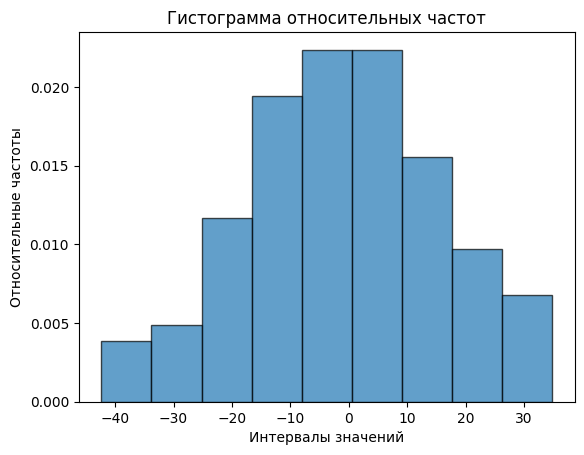

In [27]:
# Построение гистограммы относительных частот
plt.hist(s, bins=k_bins, density=True, edgecolor='black', alpha=0.7)

# Добавление заголовков и подписей осей
plt.title("Гистограмма относительных частот")
plt.xlabel("Интервалы значений")
plt.ylabel("Относительные частоты")

# Отображение гистограммы
plt.show()

## 2.1. Построить гистограмму относительных частот и теоретическую кривую распределения случайной величины X (причем гистограмму и кривую распределения разместить на одном рисунке).

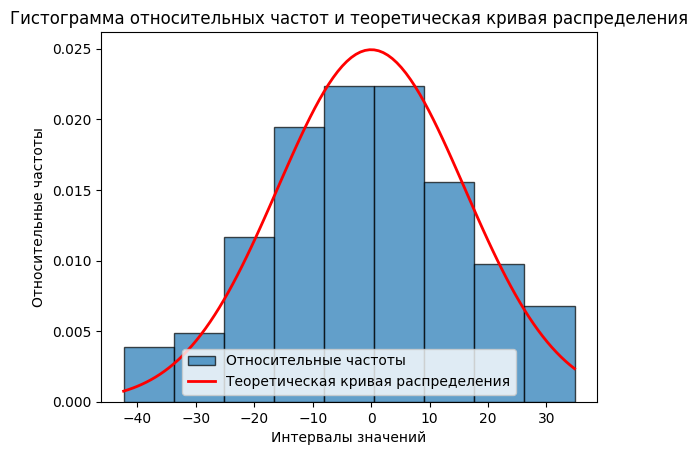

In [28]:
# Построение гистограммы относительных частот
count, bins, ignored = plt.hist(s, bins=k_bins, density=True, edgecolor='black', alpha=0.7, label="Относительные частоты")

# Теоретическая кривая нормального распределения
x = np.linspace(bins[0], bins[-1], 100)
pdf = norm.pdf(x, mu, sigma)  # Функция плотности вероятности

# Наложение кривой нормального распределения
plt.plot(x, pdf, color='red', linewidth=2, label="Теоретическая кривая распределения")

# Добавление заголовков, подписей осей и легенды
plt.title("Гистограмма относительных частот и теоретическая кривая распределения")
plt.xlabel("Интервалы значений")
plt.ylabel("Относительные частоты")
plt.legend()

# Отображение графика
plt.show()

## 2.2. Построить гистограмму абсолютных частот и график теоретической частоты распределения случайной величины X (причем и гистограмму, и график теоретической частоты разместить на одном рисунке).

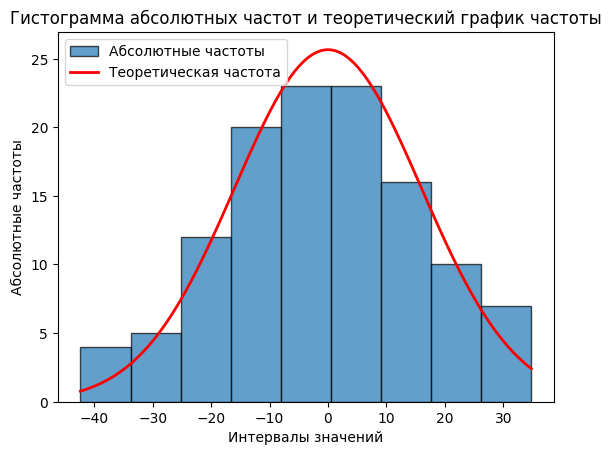

In [29]:
# Построение гистограммы абсолютных частот
count, bins, ignored = plt.hist(s, bins=k_bins, edgecolor='black', alpha=0.7, label="Абсолютные частоты")

# Вычисление значений для оси x и масштабированной теоретической частоты
x = np.linspace(bins[0], bins[-1], 100)
pdf_scaled = norm.pdf(x, mu, sigma) * n * (bins[1] - bins[0])

# Наложение теоретического графика частот
plt.plot(x, pdf_scaled, color='red', linewidth=2, label="Теоретическая частота")

# Добавление заголовков, подписей осей и легенды
plt.title("Гистограмма абсолютных частот и теоретический график частоты")
plt.xlabel("Интервалы значений")
plt.ylabel("Абсолютные частоты")
plt.legend()

# Отображение графика
plt.show()

## 2.3. Построить по выборке график эмпирической функции распределения случайной величины X (кумуляту относительных частот) и график теоретической функции распределения случайной величины X, разместив их на одном рисунке.

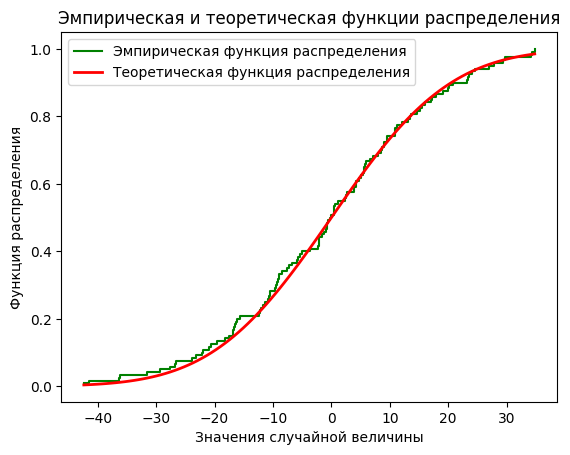

In [31]:
# Сортируем выборку для построения эмпирической функции распределения
s_sorted = np.sort(s)
# Вычисляем кумуляту относительных частот (ECDF)
empirical_cdf = np.arange(1, n + 1) / n

# Создаем значения для теоретической функции распределения (CDF)
x = np.linspace(min(s_sorted), max(s_sorted), 100)
theoretical_cdf = norm.cdf(x, mu, sigma)

# Построение графика эмпирической и теоретической функции распределения
plt.step(s_sorted, empirical_cdf, where='post', label="Эмпирическая функция распределения", color="green")
plt.plot(x, theoretical_cdf, label="Теоретическая функция распределения", color="red", linewidth=2)

# Добавление заголовков, подписей осей и легенды
plt.title("Эмпирическая и теоретическая функции распределения")
plt.xlabel("Значения случайной величины")
plt.ylabel("Функция распределения")
plt.legend()

# Отображение графика
plt.show()

## 2.4. Построить по выборке бокс-плот распределения (“ящик с усами”) и дать ему статистическую интерпретацию. В частности, ответить на вопрос: Каково теоретически ожидаемое число выбросов для выборки данного объема?

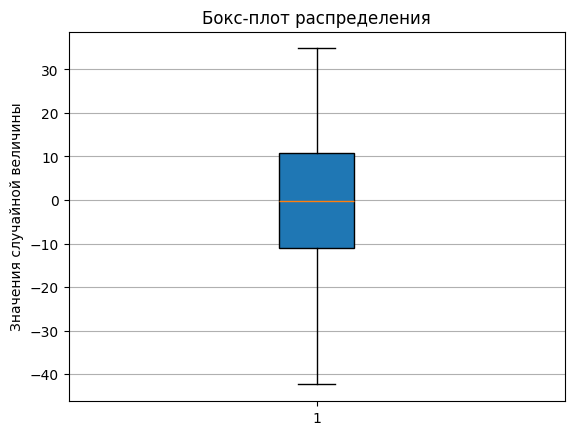

In [32]:
# Построение бокс-плота
plt.boxplot(s, vert=True, patch_artist=True)
plt.title("Бокс-плот распределения")
plt.ylabel("Значения случайной величины")
plt.grid(axis='y')

# Отображение графика
plt.show()